In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# read data
# show data details
# draw data


data = 
    Population   Profit
0      6.1101  17.5920
1      5.5277   9.1302
2      8.5186  13.6620
3      7.0032  11.8540
4      5.8598   6.8233
5      8.3829  11.8860
6      7.4764   4.3483
7      8.5781  12.0000
8      6.4862   6.5987
9      5.0546   3.8166
data description= 
        Population     Profit
count   97.000000  97.000000
mean     8.159800   5.839135
std      3.869884   5.510262
min      5.026900  -2.680700
25%      5.707700   1.986900
50%      6.589400   4.562300
75%      8.578100   7.046700
max     22.203000  24.147000


<Axes: xlabel='Population', ylabel='Profit'>

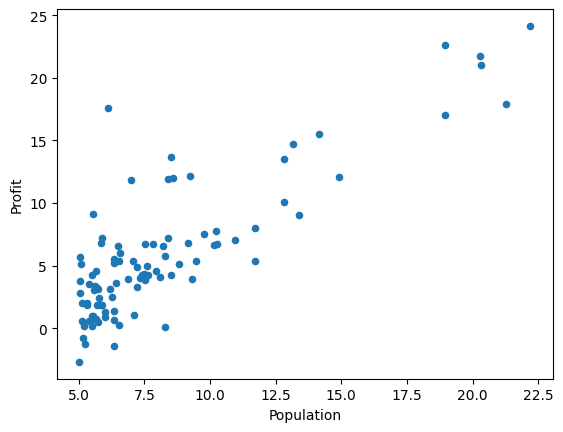

In [2]:
data_path =  "D:\\most_wonted\\ai_projects\\linear_regression\\data_set\\data.txt"
data = pd.read_csv(data_path, header= None, names = ['Population','Profit'])
print('data = \n' ,data.head(10))
print('data description= \n' ,data.describe())
data.plot(kind='scatter',x = 'Population', y = 'Profit')

# adding a new column called ones before the data

In [3]:
data.insert(0, 'Ones', 1)
print('data = \n' ,data.head(10))

data = 
    Ones  Population   Profit
0     1      6.1101  17.5920
1     1      5.5277   9.1302
2     1      8.5186  13.6620
3     1      7.0032  11.8540
4     1      5.8598   6.8233
5     1      8.3829  11.8860
6     1      7.4764   4.3483
7     1      8.5781  12.0000
8     1      6.4862   6.5987
9     1      5.0546   3.8166


# separate X (training data) from Y (target variable)

In [4]:
cols = data.shape[1]
X = data.iloc[:,0 : cols-1]
Y = data.iloc[:, cols-1 : cols]
print('X = \n' ,X.head(10))
print('Y = \n' ,Y.head(10))

X = 
    Ones  Population
0     1      6.1101
1     1      5.5277
2     1      8.5186
3     1      7.0032
4     1      5.8598
5     1      8.3829
6     1      7.4764
7     1      8.5781
8     1      6.4862
9     1      5.0546
Y = 
     Profit
0  17.5920
1   9.1302
2  13.6620
3  11.8540
4   6.8233
5  11.8860
6   4.3483
7  12.0000
8   6.5987
9   3.8166


# convert from data frame to matrix

In [5]:
print(type(X))
print(type(Y))

X = np.matrix(X)
Y = np.matrix(Y)

print(type(X))
print(type(Y))

theta = np.matrix(np.zeros(cols-1, dtype=int))
print(theta)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'numpy.matrix'>
<class 'numpy.matrix'>
[[0 0]]


# cost function

In [6]:
def computeCost(X, Y, theta):
    hx = X * theta.T
    error = hx - Y
    return np.sum(np.power(error,2)) / (2 * len(X))

print(computeCost(X, Y, theta))

32.072733877455676


# GDfunction

In [7]:
def gradientDescent(X, Y, theta, alpha, iters):
    temp = np.matrix(np.zeros(theta.shape))
    thetasCount = theta.shape[1]
    cost = np.zeros(iters)

    for i in range(iters):
        hx = X * theta.T
        error = hx - Y
        for j in range(thetasCount):
            term = np.multiply(error , X[:,j])
            temp[0,j] = theta[0,j] - (alpha / len(X)) * np.sum(term)
        theta = temp
        cost[i] = computeCost(X, Y, theta)
    return theta, cost

# initialize variables for learning rate and iterations

In [8]:
alpha = 0.01
iters = 1000

# perform gradient descent to "fit" the model parameters

In [9]:
theta, cost = gradientDescent(X, Y, theta, alpha, iters)

print('parameters = ' , theta)
print('cost for iteration = ' , cost)
print('computeCost = ' , computeCost(X, Y, theta))

parameters =  [[-3.78806857  1.18221277]]
cost for iteration =  [4.51581508 4.51567517 4.51553576 4.51539686 4.51525845 4.51512054
 4.51498313 4.51484621 4.51470979 4.51457386 4.51443842 4.51430346
 4.514169   4.51403501 4.51390151 4.51376849 4.51363595 4.51350389
 4.5133723  4.51324118 4.51311054 4.51298037 4.51285067 4.51272143
 4.51259266 4.51246436 4.51233651 4.51220913 4.51208221 4.51195574
 4.51182973 4.51170417 4.51157907 4.51145441 4.5113302  4.51120645
 4.51108313 4.51096026 4.51083784 4.51071585 4.51059431 4.5104732
 4.51035253 4.51023229 4.51011249 4.50999311 4.50987417 4.50975566
 4.50963757 4.50951991 4.50940267 4.50928586 4.50916946 4.50905349
 4.50893793 4.50882279 4.50870806 4.50859375 4.50847984 4.50836635
 4.50825327 4.50814059 4.50802832 4.50791646 4.507805   4.50769393
 4.50758327 4.50747301 4.50736315 4.50725368 4.5071446  4.50703592
 4.50692763 4.50681973 4.50671222 4.50660509 4.50649835 4.506392
 4.50628603 4.50618044 4.50607523 4.5059704  4.50586594 4.50576187
 

# gettig the best fit line

Text(0.5, 1.0, 'Predicted Profit vs. Population Size')

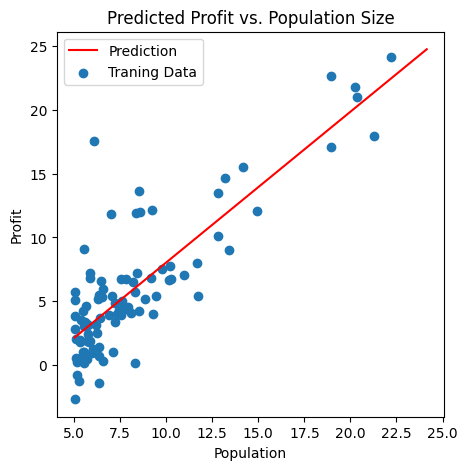

In [10]:
x = np.linspace(data.Population.min(), data.Profit.max(),100)

f = theta[0,0] + (theta[0,1] * x)

fig, ax = plt.subplots(figsize=(5,5))
ax.plot(x, f, 'r', label='Prediction')
ax.scatter(data.Population, data.Profit, label='Traning Data')
ax.legend(loc=2)
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs. Population Size')



# drawwing error graph


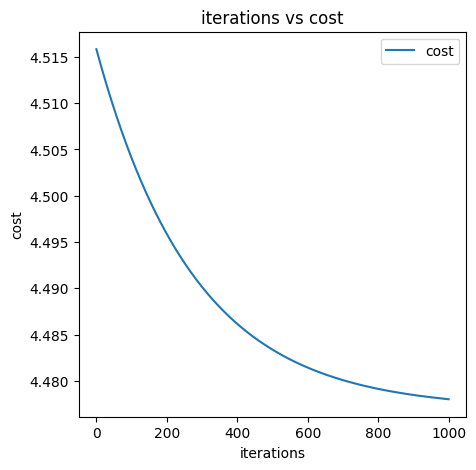

In [11]:
fig, ax =  plt.subplots(figsize=(5,5))
ax.plot(range(iters), cost, label = 'cost')
ax.set_title('iterations vs cost')
ax.set_xlabel('iterations')
ax.set_ylabel('cost')
ax .legend()
